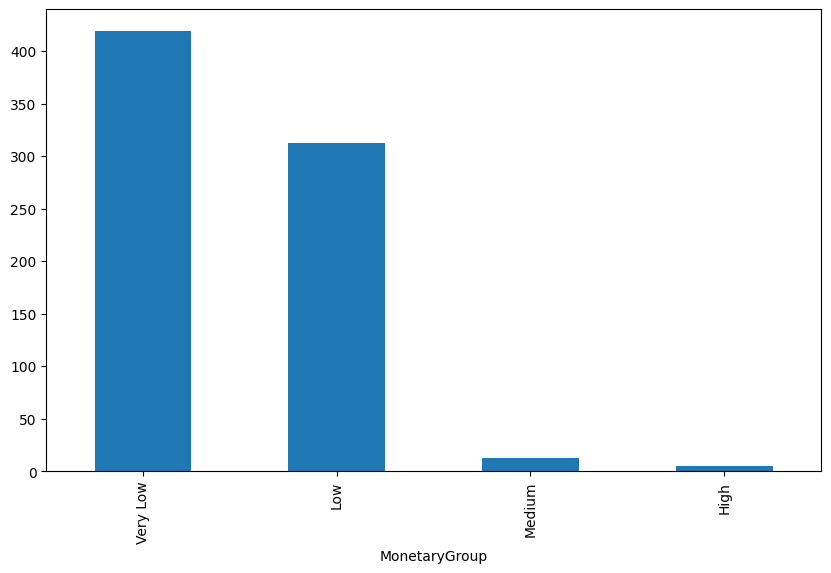

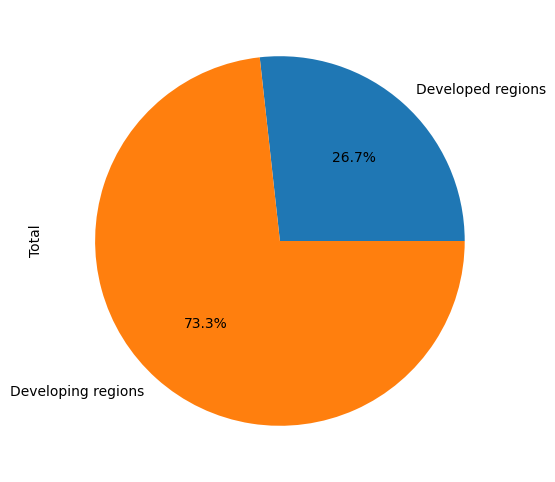

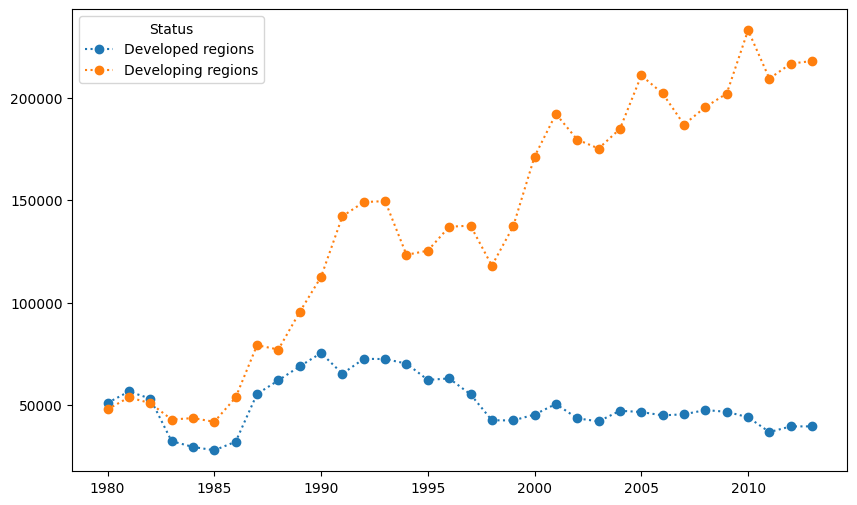

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              32812.720930
Latin America and the Caribbean     23186.303030
Northern America                   120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64


Frequency             Recency            
Class           donated not donated donated not donated
MonetaryGroup                                          
High                180          44      11           2
Low                 899        1799     497        1921
Medium              157         155      17          55
Very Low            152         739     446        4162

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

immigration_data = pd.read_excel('immigration_data.xlsx', sheet_name=1, skiprows=20, skipfooter=2)

immigration_data.rename(
    columns={
        'OdName': 'Country',
        'AreaName': 'Continent',
        'RegName': 'Region',
        'DevName': 'Status',
    },
    inplace=True,
)

immigration_data.drop(
    columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'],
    inplace=True,
)

immigration_data['Total'] = immigration_data[list(range(1980, 2014))].sum(axis=1)

# Now we will rename the countries which have a very long name to a shorter one.
immigration_data.Country.tolist()
immigration_data.Country.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)
immigration_data.Country.replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)
immigration_data.Country.replace('Venezuela (Bolivarian Republic of)', 'Venezuela', inplace=True)
immigration_data.Country.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

# If we want to apply a filter, we can use boolean filter
immigration_data[immigration_data['Total'] > 1000]
immigration_data[immigration_data['Continent'] == 'Asia']
immigration_data[immigration_data[1980] <= 1000]
immigration_data[(immigration_data['Total'] >= 25000) & (immigration_data['Total'] <= 50000)]
# The copy method is used to create a copy of the dataframe
super_immigration_data = immigration_data[immigration_data['Total'] > 100000].copy()
super_immigration_data.reset_index(drop=True, inplace=True)
super_immigration_data

# Binning is a technique to group values together to form a new value
# Binning cannot be performed for immigration_data for learning purposes as it is more complex
# Here we are trying to bin the blood transfusion data into various groups
blood_transfusion_data = pd.read_csv('blood_transfusion.csv')
# We will group this data in 4 groups, High, Medium, Low and Very Low
def categorize_blood_transfusion_data(data):
    if data > 10000:
        return 'High'
    elif data > 5000:
        return 'Medium'
    elif data > 1000:
        return 'Low'
    else:
        return 'Very Low'
# Now we will use this function to create a new column in the dataframe
blood_transfusion_data['MonetaryGroup'] = blood_transfusion_data['Monetary'].apply(categorize_blood_transfusion_data)
# Now we will visualize this data
blood_transfusion_data['MonetaryGroup'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.show()

# Now we will use groupby and pivot tables to analyze the data
# Groupby is used to group the data based on a column
# Pivot table is used to create a pivot table from the data
# Using the data, we group it by status of their development
immigration_data_grouped_by_status = immigration_data.groupby('Status')
# This will show the total number of migrations from each type of country
immigration_data_grouped_by_status.Total.sum().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.show()
# We can also see the summarized table of the data
years = list(range(1980, 2014))
immigration_data_grouped_by_status[years].sum().T.plot(kind='line', figsize=(10, 6), style='o:')
plt.show()
# If we want to know the mean of migrations from each continent, we can group by continent
immigration_data_grouped_by_continent = immigration_data.groupby('Continent')
# Depending upon the total number of migration from each continent, we take out the mean values
mean_by_continent = immigration_data_grouped_by_continent.Total.mean()
print(mean_by_continent)

# Pivot table is the advanced version of grouping data
immigration_data.pivot_table(values='Total', index='Continent', columns='Status', aggfunc='sum')
blood_transfusion_data.pivot_table(values=['Frequency', 'Recency'], index='MonetaryGroup', columns='Class', aggfunc='sum')